# **Credit Card Customer Segmentation Project**
---

# Content
- Overview
- Exploratory Data Analysis (EDA)
- Data Analysis
- Unsupervised Learning (Clustering Analysis)
- Supervised Learning (Churn Classification)



---



# Overview

## About Project

This is an unsupervised machine learning project.

|  Column Name    |           Description                   | Type  |
|-----------------|-----------------------------------------|-------|
| **'CLIENTNUM'** | Unique identifier for each customer     |Integer|
|**'Attrition_Flag'**| whether a customer has churned out or not (churned out: stopped using the credit card)                |Boolean|
|**Customer_Age**| age of customer                          |Integer|
|**Gender**| gender of customer                             |String |
|**'Dependent_count'**|\# of dependents that a customer has |Integer|
|**'Education_Level'**| education level of customer         |String |
|**'Marital_Status'** | marital status of customer          |String |
|**'Income_Category'**| income category of customer         |String |
|**'Card_Category'**| type of card held by customer         |String |
|**'Months_on_book'** | for how long a customer has been using their credit card in months                                       |Integer|
|**'Total_Relationship_Count'**| total number of relationships customer has with the credit card provider                  |Integer|
|**'Months_Inactive_12_mon'** | \# of months a customer has been inactive in the last 12 months                              |Integer|
|**'Contacts_Count_12_mon'** | \# of times a customer has been contacted by the credit card provider in the past 12 months |Integer|
|**'Credit_Limit'**| maximum limit of a credit card         |Float  |
|**'Total_Revolving_Bal'**|Total amount currently owed on revolving credit                                                      |Integer|
|**'Avg_Open_To_Buy'**|Average amount available for spending on credit cards.                                               |Float  |
|**'Total_Amt_Chng_Q4_Q1'**|Total amount changed from quarter 4 to quarter 1                                                   |Integer|
|**'Total_Trans_Amt'**|Total amount spent in the last 12 months|Float  |
|**'Total_Trans_Ct'**| How many transactions a customer has made| Integer                                                     |Integer|
|**'Total_Ct_Chng_Q4_Q1'**|Total count changed from quarter 4 to quarter 1                                                   |Integer|
|**'Avg_Utilization_Ratio'**| The ratio between Revolving Balance and Credit Limit                                            |Float  |




---



## Detailed Explanation of Some Columns

### Total_Relationship_Count


- A metric that indicates the number of products/services a customer is using from a specific company/provider.

- Some examples of what might be included in the Total_Relationship_Count:

 - Credit cards
 - Savings accounts
 - Loans
 - Insurance
 - Other financial products

- By analyzing the Total_Relationship_Count, companies can gain insights into the value of their customers and identify opportunities for cross-selling or upselling additional products and services. Customers with a higher Total_Relationship_Count are generally considered more valuable and less likely to churn.

### Total_Revolving_Bal


- Total Revovling Balance is a numerical variable (integer) that represents refers to the total amount of money that the customer owes on their credit cards.

- By analyzing the Total_Revolving_Bal, companies can gain insights into customer spending habits, credit utilization,
and the risk of default. Customers with high revolving balances may be more likely to experience financial difficulties
or default on their debt.

### Avg_Open_To_Buy

- Average Open To Buy is a numerical variable (float) that represents the average amount of credit available to a customer on their credit card accounts. It is calculated by subtracting the customer's current revolving balance from their credit limit.

- By analyzing the Avg_Open_To_Buy, companies can gain insights into customer spending habits and credit utilization. A high Avg_Open_To_Buy may indicate that the customer has a low credit utilization ratio, which can be a positive factor in credit scoring. On the other hand, a low Avg_Open_To_Buy may suggest that the customer is nearing their credit limit, which could be a sign of financial strain.

### Total_Amt_Chng_Q4_Q1


- A numerical variable (integer) that indicates the change in the total amount spent or charged by a customer from the fourth quarter of the previous year to the first quarter of the current year.

- Here's a breakdown of what this metric indicates:

 - Q4: The fourth quarter of the previous year (October, November, and December).
 - Q1: The first quarter of the current year (January, February, and March).
 - Total amount changed: The difference between the total amount spent or charged in Q4 and Q1.

- This metric can provide insights into customer spending patterns and seasonal trends. For example, a positive value for Total_Amt_Chng_Q4_Q1 indicates that the customer spent more in Q1 compared to Q4, while a negative value suggests a decrease in spending.

### Total_Ct_Chng_Q4_Q1

- A numerical variable (integer) that indicates the change in
the total number of transactions made by a customer from the fourth quarter of the previous year to the first quarter of the current year.

- This metric can provide insights into customer spending patterns and transaction frequency. For example, a positive value for Total_Ct_Chng_Q4_Q1 indicates that the customer made more transactions in Q1 compared to Q4, while a negative value suggests a decrease in transaction activity.


### Avg_Utilization_Ratio


- The percentage of a customer's available credit that is currently being used. It is calculated by dividing the customer's current balance by their credit limit.

- By analyzing the Avg_Utilization_Ratio, companies can gain insights into customer spending habits and credit risk. A high utilization ratio may indicate that the customer is nearing their credit limit, which could be a sign of financial strain or a higher risk of default. On the other hand, a low utilization ratio may suggest that the customer is not using their available credit to its full potential.



---



In [ ]:
# importing libraries and modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import plotly.express as px
from ipywidgets import interact, IntSlider

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import random
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix, silhouette_score


In [ ]:
# setting plotting characteristics
pd.set_option('display.max_columns', None)
color_palettes = sns.color_palette()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,3)
%matplotlib inline


In [ ]:
# reading data
df = pd.read_csv('/content/credit_card_customer_segmentation.csv')


# Exploratory Data Analysis (EDA)

In [ ]:
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.shape


(10127, 23)

In [ ]:
df.columns


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# rename some columns to have a unified convention
df = df.rename(
    columns = {
        'CLIENTNUM': 'Client_Num',
        'Dependent_count': 'Dependent_Ct',
        'Months_on_book': 'Months_On_Book',
        'Total_Relationship_Count': 'Total_Relationship_Ct',
        'Months_Inactive_12_mon': 'Months_Inactive_12_Mon',
        'Contacts_Count_12_mon': 'Contacts_Ct_12_Mon',
        }
    )


In [ ]:
# remove not needed columns
df = df[[
  'Client_Num', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_Ct', 'Education_Level',
  'Marital_Status', 'Income_Category', 'Card_Category', 'Months_On_Book', 'Total_Relationship_Ct',
  'Months_Inactive_12_Mon', 'Contacts_Ct_12_Mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
  # 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
  # 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]]


In [ ]:
df.columns


Index(['Client_Num', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_Ct', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category', 'Months_On_Book', 'Total_Relationship_Ct',
       'Months_Inactive_12_Mon', 'Contacts_Ct_12_Mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
# columns data types
print(df.dtypes)


Client_Num                  int64
Attrition_Flag             object
Customer_Age                int64
Gender                     object
Dependent_Ct                int64
Education_Level            object
Marital_Status             object
Income_Category            object
Card_Category              object
Months_On_Book              int64
Total_Relationship_Ct       int64
Months_Inactive_12_Mon      int64
Contacts_Ct_12_Mon          int64
Credit_Limit              float64
Total_Revolving_Bal         int64
Avg_Open_To_Buy           float64
Total_Amt_Chng_Q4_Q1      float64
Total_Trans_Amt             int64
Total_Trans_Ct              int64
Total_Ct_Chng_Q4_Q1       float64
Avg_Utilization_Ratio     float64
dtype: object


In [ ]:
# numerical columns summary statistics
df.describe()


,Client_Num,Customer_Age,Dependent_Ct,Months_On_Book,Total_Relationship_Ct,Months_Inactive_12_Mon,Contacts_Ct_12_Mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
# visualize the relationship between all column to see quick overview
sns.pairplot(df)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# explore null values
print(df.isnull().sum())


Client_Num                0
Attrition_Flag            0
Customer_Age              0
Gender                    0
Dependent_Ct              0
Education_Level           0
Marital_Status            0
Income_Category           0
Card_Category             0
Months_On_Book            0
Total_Relationship_Ct     0
Months_Inactive_12_Mon    0
Contacts_Ct_12_Mon        0
Credit_Limit              0
Total_Revolving_Bal       0
Avg_Open_To_Buy           0
Total_Amt_Chng_Q4_Q1      0
Total_Trans_Amt           0
Total_Trans_Ct            0
Total_Ct_Chng_Q4_Q1       0
Avg_Utilization_Ratio     0
dtype: int64


## Columns

In [ ]:
df.head()


,Client_Num,Attrition_Flag,Customer_Age,Gender,Dependent_Ct,Education_Level,Marital_Status,Income_Category,Card_Category,Months_On_Book,Total_Relationship_Ct,Months_Inactive_12_Mon,Contacts_Ct_12_Mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Client_Num Column

In [ ]:
df.Client_Num.dtype


dtype('int64')

In [ ]:
# check if Client_Num column has duplicates
len(df.Client_Num.unique()), df.shape


(10127, (10127, 21))

### Attrition_Flag Column

In [ ]:
print(df.Attrition_Flag.value_counts())


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


### Customer_Age Column

In [ ]:
df.Customer_Age.describe()


,Customer_Age
count,10127.000000
mean,46.325960
std,8.016814
min,26.000000
25%,41.000000
50%,46.000000
75%,52.000000
max,73.000000


### Gender Column

In [ ]:
print(df.Gender.value_counts())


Gender
F    5358
M    4769
Name: count, dtype: int64


### Dependent_Ct Column

In [ ]:
print(df.Dependent_Ct.value_counts().sort_index())


Dependent_Ct
0     904
1    1838
2    2655
3    2732
4    1574
5     424
Name: count, dtype: int64


### Education_Level Column

In [ ]:
print(df.Education_Level.value_counts())


Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


### Marital_Status Column

In [ ]:
print(df.Marital_Status.value_counts())


Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


### Income_Category Column

In [ ]:
df.Income_Category.unique()


array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
# order Income_Category column
income_category_counts = df.Income_Category.value_counts(sort = False)
custom_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
temp_series = pd.Categorical(df['Income_Category'], categories = custom_order, ordered = True)
income_category_counts = pd.DataFrame(temp_series.value_counts())
print(income_category_counts)


                count
Less than $40K   3561
$40K - $60K      1790
$60K - $80K      1402
$80K - $120K     1535
$120K +           727
Unknown          1112


### Card_Category Column

In [ ]:
print(df.Card_Category.value_counts())


Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


### Months_On_Book

In [ ]:
df.Months_On_Book.describe()


,Months_On_Book
count,10127.000000
mean,35.928409
std,7.986416
min,13.000000
25%,31.000000
50%,36.000000
75%,40.000000
max,56.000000


### Total_Relationship_Count Column
       

In [ ]:
print(df.Total_Relationship_Ct.value_counts().sort_index())


Total_Relationship_Ct
1     910
2    1243
3    2305
4    1912
5    1891
6    1866
Name: count, dtype: int64


### Months_Inactive_12_Mon Column

In [ ]:
print(df.Months_Inactive_12_Mon.value_counts().sort_index())


Months_Inactive_12_Mon
0      29
1    2233
2    3282
3    3846
4     435
5     178
6     124
Name: count, dtype: int64


### Contacts_Ct_12_Mon Column

In [ ]:
print(df.Contacts_Ct_12_Mon.value_counts().sort_index())


Contacts_Ct_12_Mon
0     399
1    1499
2    3227
3    3380
4    1392
5     176
6      54
Name: count, dtype: int64


### Credit_Limit Column

In [ ]:
df.Credit_Limit.describe()


,Credit_Limit
count,10127.000000
mean,8631.953698
std,9088.776650
min,1438.300000
25%,2555.000000
50%,4549.000000
75%,11067.500000
max,34516.000000


### Total_Revolving_Bal Column


In [ ]:
df.Total_Revolving_Bal.describe()


,Total_Revolving_Bal
count,10127.000000
mean,1162.814061
std,814.987335
min,0.000000
25%,359.000000
50%,1276.000000
75%,1784.000000
max,2517.000000


### Avg_Open_To_Buy Column


In [ ]:
df.Avg_Open_To_Buy.describe()


,Avg_Open_To_Buy
count,10127.000000
mean,7469.139637
std,9090.685324
min,3.000000
25%,1324.500000
50%,3474.000000
75%,9859.000000
max,34516.000000


### Total_Amt_Chng_Q4_Q1 Column

In [ ]:
df.Total_Amt_Chng_Q4_Q1.describe()


,Total_Amt_Chng_Q4_Q1
count,10127.000000
mean,0.759941
std,0.219207
min,0.000000
25%,0.631000
50%,0.736000
75%,0.859000
max,3.397000


### Total_Trans_Amt Column


In [ ]:
df.Total_Trans_Amt.describe()


,Total_Trans_Amt
count,10127.000000
mean,4404.086304
std,3397.129254
min,510.000000
25%,2155.500000
50%,3899.000000
75%,4741.000000
max,18484.000000


### Total_Trans_Ct Column


In [ ]:
df.Total_Trans_Ct.describe()


,Total_Trans_Ct
count,10127.000000
mean,64.858695
std,23.472570
min,10.000000
25%,45.000000
50%,67.000000
75%,81.000000
max,139.000000


### Total_Ct_Chng_Q4_Q1 Column

In [ ]:
df.Total_Ct_Chng_Q4_Q1.describe()


,Total_Ct_Chng_Q4_Q1
count,10127.000000
mean,0.712222
std,0.238086
min,0.000000
25%,0.582000
50%,0.702000
75%,0.818000
max,3.714000


### Avg_Utilization_Ratio Column

In [ ]:
df.Avg_Utilization_Ratio.describe()


,Avg_Utilization_Ratio
count,10127.000000
mean,0.274894
std,0.275691
min,0.000000
25%,0.023000
50%,0.176000
75%,0.503000
max,0.999000


## Data Distribution of Numerical Columns (Summary Plots)

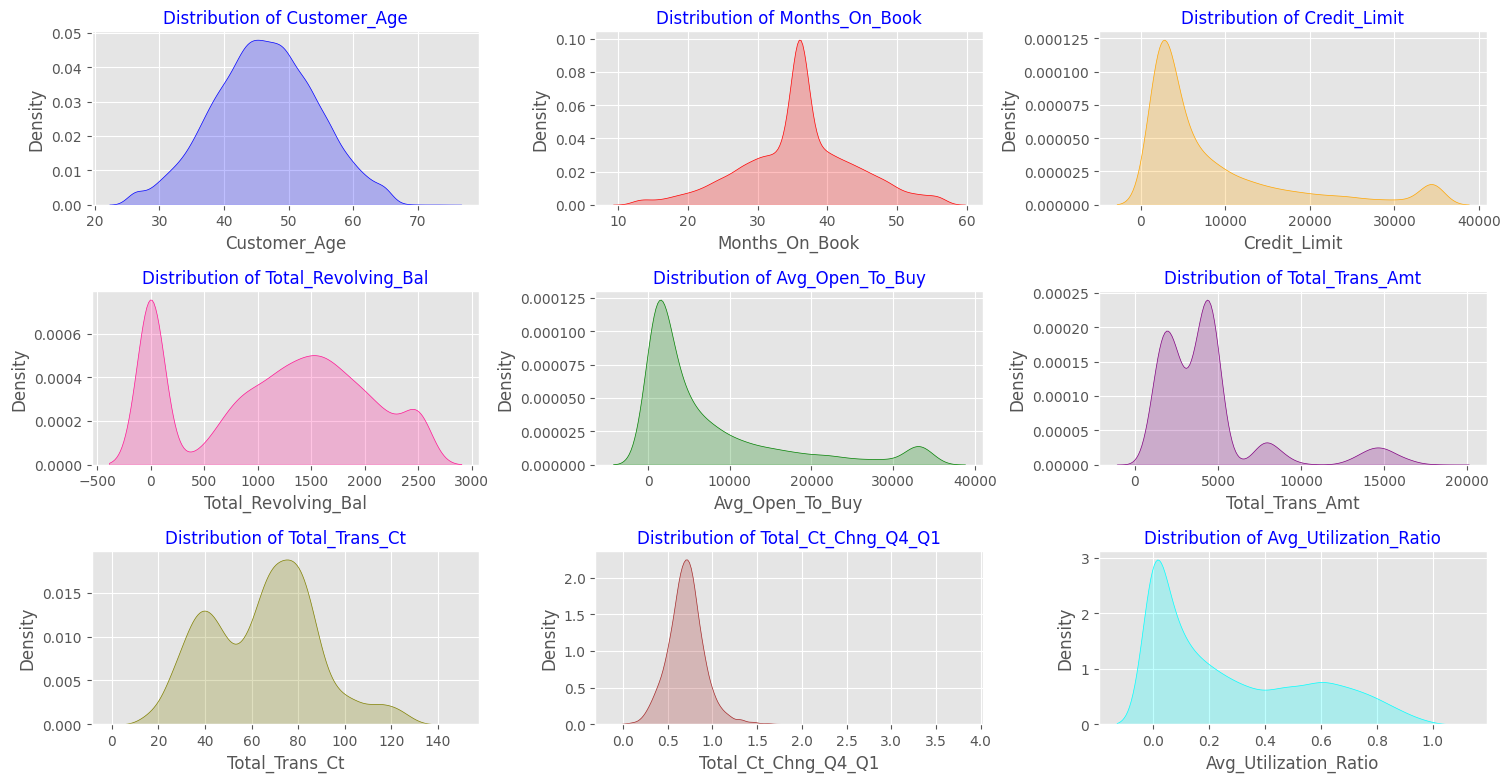

In [ ]:
# data distribution summary plots (numercial columns)

# list of features and their corresponding colors
features = [
    ('Customer_Age', 'blue'),
    ('Months_On_Book', 'red'),
    ('Credit_Limit', 'orange'),
    ('Total_Revolving_Bal', 'deeppink'),
    ('Avg_Open_To_Buy', 'green'),
    ('Total_Trans_Amt', 'purple'),
    ('Total_Trans_Ct', 'olive'),
    ('Total_Ct_Chng_Q4_Q1', 'brown'),
    ('Avg_Utilization_Ratio', 'cyan')
    ]

# create subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 9))

# loop through each feature and plot
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(x = df[feature], ax = axs[row, col], color = color, fill = True)
    axs[row, col].set_title(f'Distribution of {feature}', color = 'blue', fontsize = 12)

# adjust layout
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
plt.show()


## Data Distribution of Categorical Columns (Summary Plots)

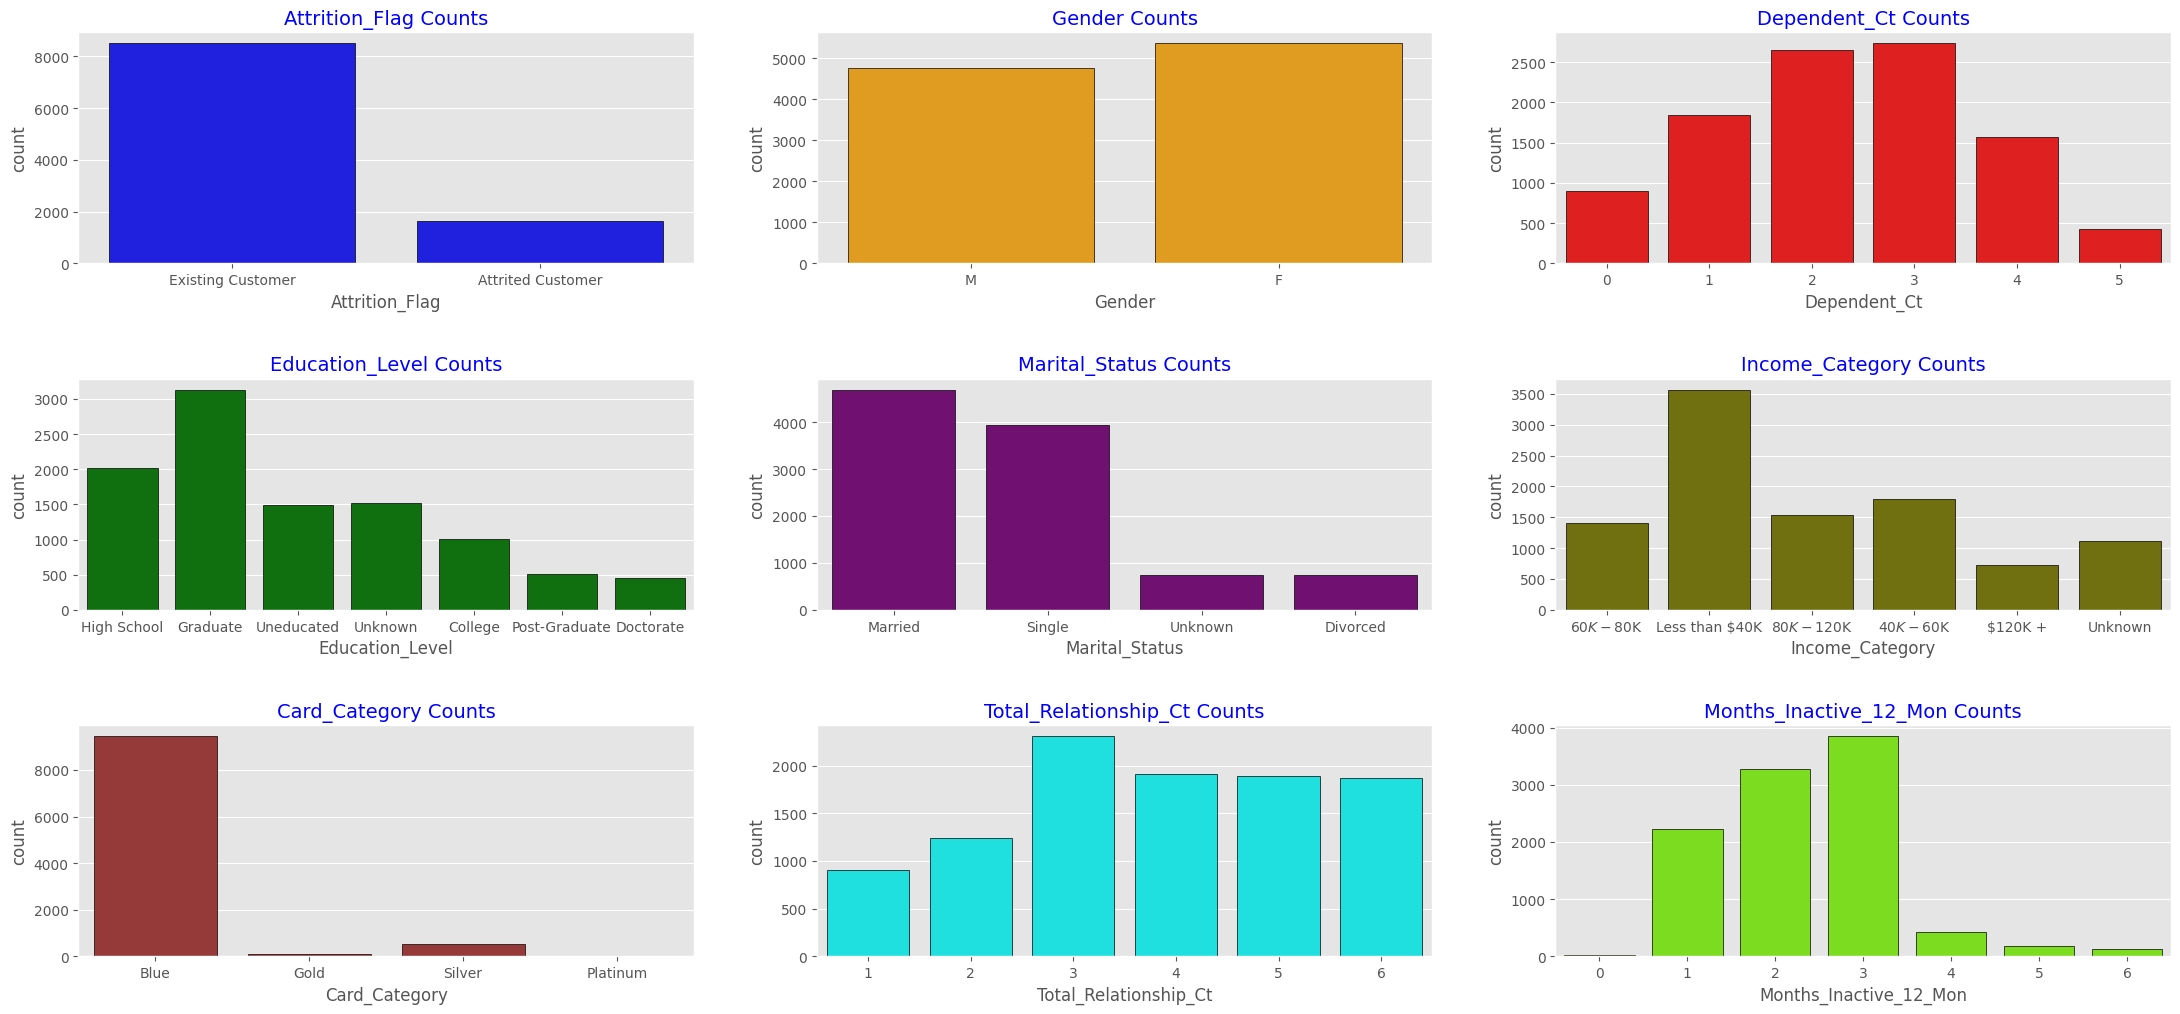

In [ ]:
# values counts of summary plots (categorical columns)

# list of features and their corresponding colors
features = [
    ('Attrition_Flag', 'blue'),
    ('Gender', 'orange'),
    ('Dependent_Ct', 'red'),
    ('Education_Level', 'green'),
    ('Marital_Status', 'purple'),
    ('Income_Category', 'olive'),
    ('Card_Category', 'brown'),
    ('Total_Relationship_Ct', 'cyan'),
    ('Months_Inactive_12_Mon', 'lawngreen')
    ]

# create subplots
fig, axs = plt.subplots(3, 3, figsize=(27, 12))

# loop through each feature and plot
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.countplot(data = df, x = str(feature), ax = axs[row, col], color = color, edgecolor = 'k')
    axs[row, col].set_title(f'{feature} Counts', color = 'blue', fontsize = 14)

# adjust layout
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()


🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩

# Data Analysis

In [ ]:
df.head()


,Client_Num,Attrition_Flag,Customer_Age,Gender,Dependent_Ct,Education_Level,Marital_Status,Income_Category,Card_Category,Months_On_Book,Total_Relationship_Ct,Months_Inactive_12_Mon,Contacts_Ct_12_Mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Customers Spending Habits

### Gender and Age Bias Analysis

#### Gender vs. Card Category

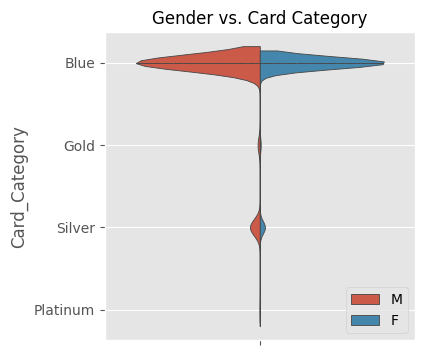

In [ ]:
# visualize relationship between gender and card category
plt.figure(figsize = (4, 4))
sns.violinplot(data = df, y = 'Card_Category', hue = 'Gender', split = True, inner = 'quartiles')
plt.legend(loc = 4)
plt.title('Gender vs. Card Category', fontsize = 12)
plt.show()


The above violin plot provides a visual representation of the distribution of card categories across genders. Based on the plot, we can observe the following:

**Card Category Distribution:**
  - Blue: The distribution for the Blue card category is relatively spread out for both genders, with a slight skew towards the lower end for females.
  - Gold: The Gold card category appears to have a more concentrated distribution for both genders, with a slightly higher median for males.
  - Silver: The Silver card category has a similar distribution for both genders, with a slightly higher median for females.
  - Platinum: The Platinum card category shows a more pronounced difference between genders. Males have a higher median and a more concentrated distribution compared to females.

**Gender Differences:**
  - Blue and Silver: There is no significant difference in the distribution of Blue and Silver cards between genders.
  - Gold: The Gold card category is slightly more prevalent among males.
  - Platinum: Males are more likely to have Platinum cards compared to females.

Overall, the violin plot suggests that while there is no significant difference in the distribution of Blue and Silver cards between genders, males are more likely to hold Gold and Platinum cards compared to females.



---



#### Age vs. Card Category

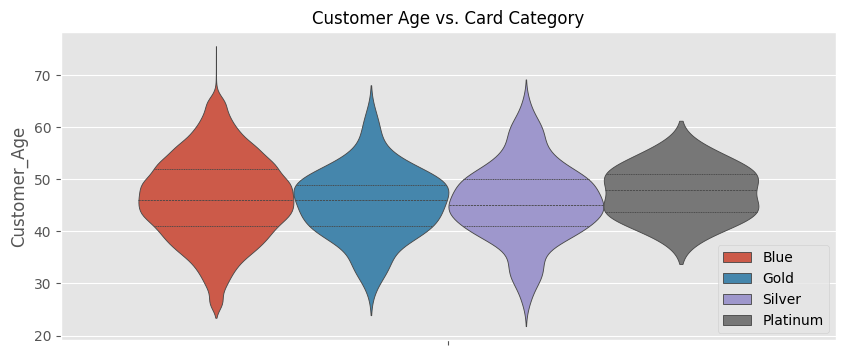

In [ ]:
# visualize relationship between customer age and card category
plt.figure(figsize = (10, 4))
sns.violinplot(data = df, y = 'Customer_Age', hue = 'Card_Category', inner = 'quartiles')
plt.legend(loc = 4)
plt.title('Customer Age vs. Card Category', fontsize = 12)
plt.show()




---



#### Gender vs. Transaction Amount

In [ ]:
# mean transaction amount made by each gender
pd.DataFrame(df.groupby('Gender')['Total_Trans_Amt'].mean().sort_index())


,Total_Trans_Amt
Gender,
F,4324.318216
M,4493.706228


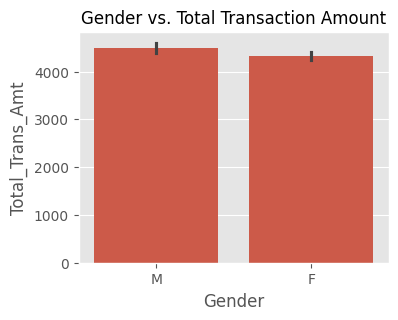

In [ ]:
# visualize the mean transaction amount made by each gender
plt.figure(figsize = (4, 3))
sns.barplot(data = df, x = 'Gender', y = 'Total_Trans_Amt', estimator = 'mean')
plt.title('Gender vs. Total Transaction Amount', fontsize = 12)
plt.show()




---



#### Age vs. Transaction Amount

In [ ]:
# mean transaction amount by age
print(pd.DataFrame(df.groupby('Customer_Age')['Total_Trans_Amt'].mean().sort_index()))


              Total_Trans_Amt
Customer_Age                 
26                2586.641026
27                5315.281250
28                4906.655172
29                5656.142857
30                4875.242857
31                6807.076923
32                5992.669811
33                3660.551181
34                3890.376712
35                3701.211957
36                3691.941176
37                3854.980769
38                4358.501650
39                4273.735736
40                4615.880886
41                4710.343008
42                4716.967136
43                4618.598309
44                4638.342000
45                4629.154321
46                4543.071429
47                4459.613779
48                4581.343220
49                4839.705051
50                4668.730088
51                4802.175879
52                4613.851064
53                4111.465116
54                3805.084691
55                3777.286738
56                4332.503817
57        

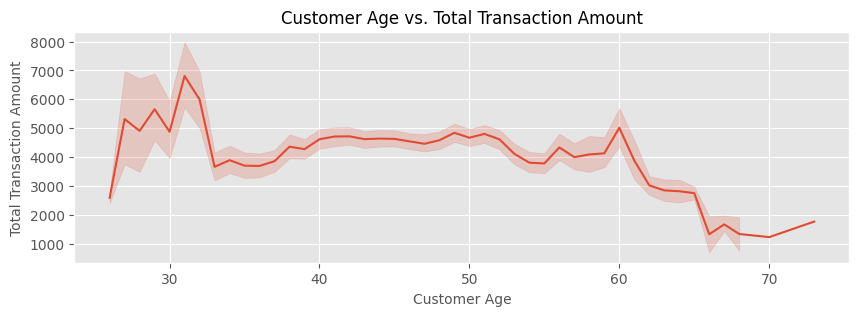

In [ ]:
# visualize the mean transaction amount by age
sns.lineplot(data = df, x = 'Customer_Age', y = 'Total_Trans_Amt', estimator = 'mean')
plt.xlabel('Customer Age', fontsize = 10)
plt.ylabel('Total Transaction Amount', fontsize = 10)
plt.title('Customer Age vs. Total Transaction Amount', fontsize = 12)
plt.show()




---



#### Age and Gender vs. Transaction Amount

In [ ]:
# mean transaction amount by age for each gender
pd.DataFrame(df.groupby(['Customer_Age', 'Gender'])['Total_Trans_Amt'].mean().sort_index())


Total_Trans_Amt
Customer_Age Gender                 
26           F           2738.923077
             M           2434.358974
27           F           5068.789474
             M           5675.538462
28           F           4854.461538
...                              ...
67           F           1513.000000
             M           1822.500000
68           M           1335.000000
70           M           1227.000000
73           M           1765.000000

[86 rows x 1 columns]

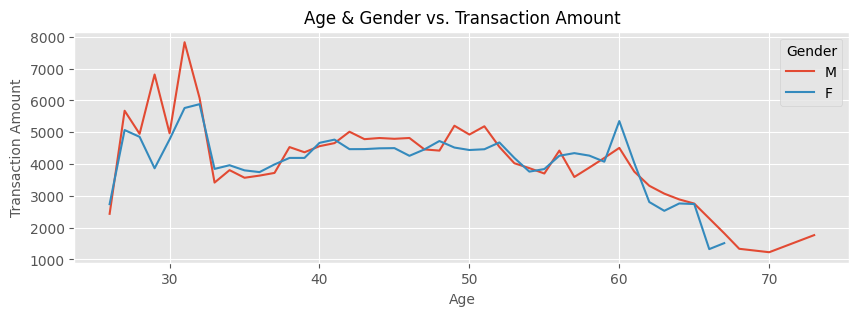

In [ ]:
# visualize the mean transaction amount by age for each gender
sns.lineplot(
    data = df,
    x = 'Customer_Age',
    y = 'Total_Trans_Amt',
    estimator = 'mean',
    hue = 'Gender',
    errorbar = None
    )
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Transaction Amount', fontsize = 10)
plt.title('Age & Gender vs. Transaction Amount', fontsize = 12)
plt.show()




---



#### Dependent Count vs. Transaction Amount

In [ ]:
# relationship between dependent count and transaction amount
print(pd.DataFrame(df.groupby('Dependent_Ct')['Total_Trans_Amt'].mean().sort_index()))


              Total_Trans_Amt
Dependent_Ct                 
0                 4110.331858
1                 4411.088139
2                 4475.953296
3                 4309.106515
4                 4469.992376
5                 4917.356132


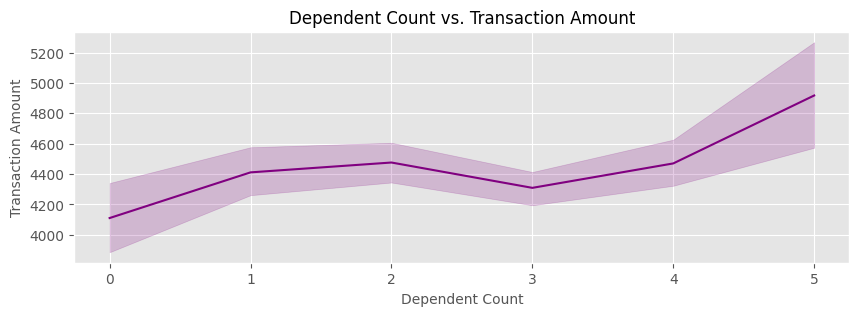

In [ ]:
# visualize the relationship between dependent count and transaction amount
sns.lineplot(
    data = df,
    x = 'Dependent_Ct',
    y = 'Total_Trans_Amt',
    estimator = 'mean',
    color = 'purple'
    )
plt.xlabel('Dependent Count', fontsize = 10)
plt.ylabel('Transaction Amount', fontsize = 10)
plt.title('Dependent Count vs. Transaction Amount', fontsize = 12)
plt.show()




---



## Debt Analysis

### Credit Limit vs. Revolving Balance

In [ ]:
df['Credit_Limit'].describe()


,Credit_Limit
count,10127.000000
mean,8631.953698
std,9088.776650
min,1438.300000
25%,2555.000000
50%,4549.000000
75%,11067.500000
max,34516.000000


In [ ]:
df['Total_Revolving_Bal'].describe()


,Total_Revolving_Bal
count,10127.000000
mean,1162.814061
std,814.987335
min,0.000000
25%,359.000000
50%,1276.000000
75%,1784.000000
max,2517.000000


In [ ]:
# explore exceptions above credit limit
df[df['Total_Revolving_Bal'] > df['Credit_Limit']]


,Client_Num,Attrition_Flag,Customer_Age,Gender,Dependent_Ct,Education_Level,Marital_Status,Income_Category,Card_Category,Months_On_Book,Total_Relationship_Ct,Months_Inactive_12_Mon,Contacts_Ct_12_Mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


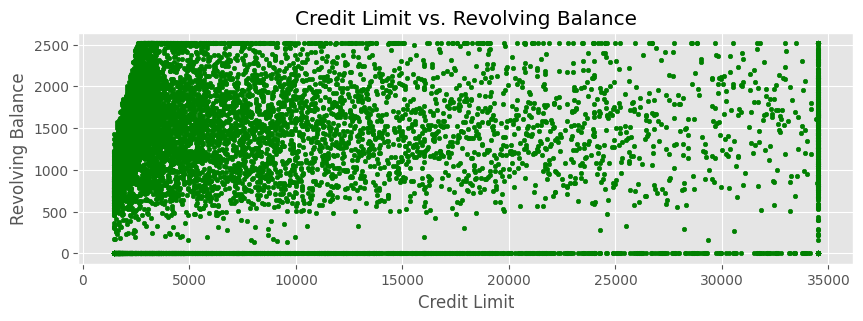

In [ ]:
# visualize credit limit and revolving balance
plt.scatter(df['Credit_Limit'], df['Total_Revolving_Bal'], s = 10, color = 'green')
plt.xlabel('Credit Limit')
plt.ylabel('Revolving Balance')
plt.title('Credit Limit vs. Revolving Balance')
plt.show()




---



### Average Utalization Ratio

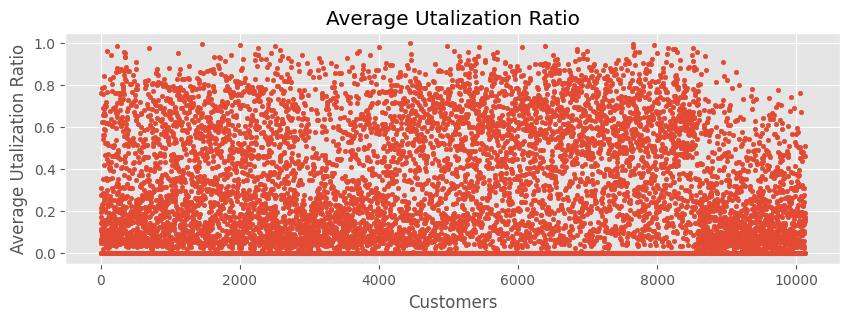

In [ ]:
# visualize average utalization ratio for each customer
plt.scatter(df.index, df['Avg_Utilization_Ratio'], s = 10, edgecolor = None)
plt.title('Average Utalization Ratio')
plt.xlabel('Customers')
plt.ylabel('Average Utalization Ratio')
plt.show()


In [ ]:
# add new column with to indicate debt risk level
X = df.copy()
X['debt_risk_indicator'] = X['Avg_Utilization_Ratio'].apply(
    lambda x: 'high risk' if x >= 0.8 else ('low risk' if x <= 0.2 else 'moderate risk')
    )
X[['Avg_Utilization_Ratio', 'debt_risk_indicator']]


,Avg_Utilization_Ratio,debt_risk_indicator
0,0.061,low risk
1,0.105,low risk
2,0.000,low risk
3,0.760,moderate risk
4,0.000,low risk
...,...,...
10122,0.462,moderate risk
10123,0.511,moderate risk
10124,0.000,low risk
10125,0.000,low risk


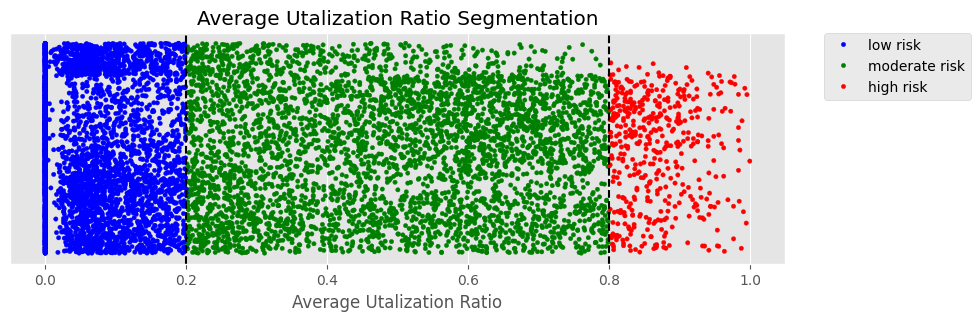

In [ ]:
# visualize average utalization ratio for each customer according to debt risk indicator column
sns.scatterplot(
    x = X['Avg_Utilization_Ratio'],
    y = X.index,
    hue = X['debt_risk_indicator'],
    s = 10,
    edgecolor = None,
    palette = ['blue', 'green', 'red']
    )
plt.axvline(x = 0.2, color = 'black', linestyle = '--')
plt.axvline(x = 0.8, color = 'black', linestyle = '--')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.title('Average Utalization Ratio Segmentation')
plt.xlabel('Average Utalization Ratio')
plt.ylabel('')
plt.yticks([])
plt.show()




---



## Customers Inactivity Analysis

### Revolving Balance and Months Inactive in 12 Months

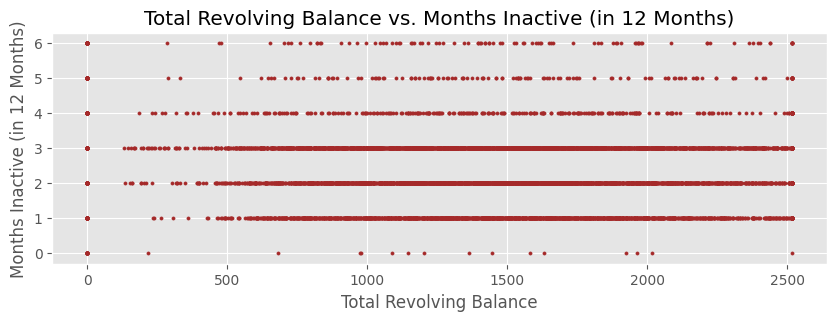

In [ ]:
# visualize revolving balance against months inactive
plt.scatter(df['Total_Revolving_Bal'], df['Months_Inactive_12_Mon'], s = 5, color = 'brown')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Months Inactive (in 12 Months)')
plt.title('Total Revolving Balance vs. Months Inactive (in 12 Months)')
plt.show()


In [ ]:
# create a new column that indicates inactivity risk level

X = df.copy()

months_threshold = 4
balance_threshold = 2000.

# define conditions for the new column (inactivity_risk_indicator)
conditions = [
    (X['Months_Inactive_12_Mon'] >= months_threshold) & (X['Total_Revolving_Bal'] >= balance_threshold),
    (X['Months_Inactive_12_Mon'] >= months_threshold) & (X['Total_Revolving_Bal'] < balance_threshold),
    (X['Months_Inactive_12_Mon'] < months_threshold)
    ]

# define the corresponding risk levels
risk_levels = ['high risk', 'moderate risk', 'low risk']

# create the new column using np.select
X['inactivity_risk_indicator'] = np.select(conditions, risk_levels)

# view the updated dataframe
X[['Total_Revolving_Bal', 'Months_Inactive_12_Mon', 'inactivity_risk_indicator']]


,Total_Revolving_Bal,Months_Inactive_12_Mon,inactivity_risk_indicator
0,777,1,low risk
1,864,1,low risk
2,0,1,low risk
3,2517,4,high risk
4,0,1,low risk
...,...,...,...
10122,1851,2,low risk
10123,2186,2,low risk
10124,0,3,low risk
10125,0,3,low risk


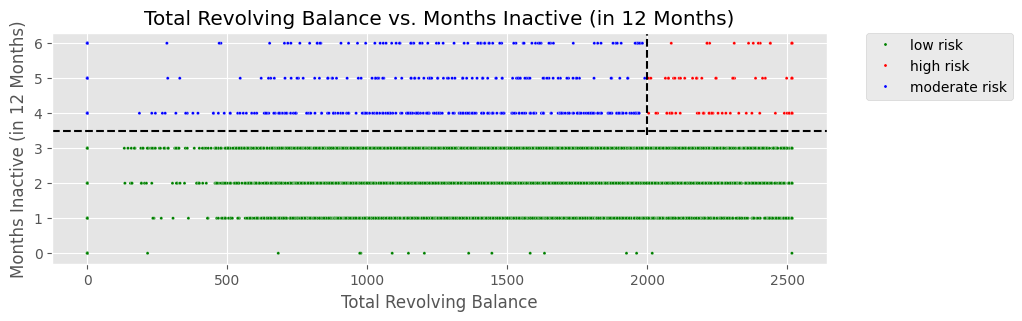

In [ ]:
# visualize months inactive and inactivity risk level
sns.scatterplot(
    data = X,
    x = 'Total_Revolving_Bal',
    y = 'Months_Inactive_12_Mon',
    hue = 'inactivity_risk_indicator',
    s = 5,
    palette = ['green', 'red', 'blue']
    )
plt.axvline(x = 2000., color = 'black', linestyle = '--', ymin = 3.5/plt.gca().get_ylim()[1])
plt.axhline(y = 3.5, color = 'black', linestyle = '--')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.xlabel('Total Revolving Balance')
plt.ylabel('Months Inactive (in 12 Months)')
plt.title('Total Revolving Balance vs. Months Inactive (in 12 Months)')
plt.show()


### Credit Limit and Months Inactive in 12 Months

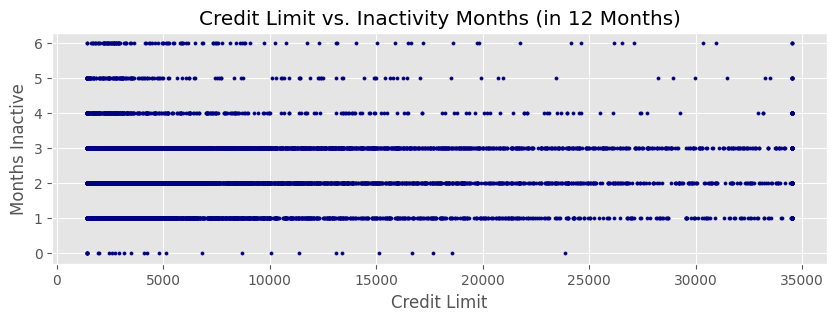

In [ ]:
# visualize credit limit and months inactive in 12 months
plt.scatter(df['Credit_Limit'], df['Months_Inactive_12_Mon'], s = 5, edgecolor = None, color = 'navy')
plt.xlabel('Credit Limit')
plt.ylabel('Months Inactive')
plt.title('Credit Limit vs. Inactivity Months (in 12 Months)')
plt.show()


### Months Inactive in 12 Months and Contacts in 12 Months

In [ ]:
# indicate if there are some problems with customers so that contacts are a lot
inactivity_contacts = pd.DataFrame(df.groupby('Months_Inactive_12_Mon')['Contacts_Ct_12_Mon'].mean().round())
print(inactivity_contacts)


In [ ]:
# visualize contacts count according to months inactive
plt.figure(figsize = (5, 3))
plt.bar(inactivity_contacts.index, inactivity_contacts['Contacts_Ct_12_Mon'], edgecolor = 'k')
plt.xlabel('Months Inactive in 12 Months', fontsize = 9)
plt.ylabel('Contacts Count in 12 Months', fontsize = 9)
plt.title('Months Inactivity vs. Monthly Contacts', fontsize = 10)
plt.show()


## Churn Analysis

In [ ]:
# extract different values for Attrition_Flag column
df_not_churned = df[df['Attrition_Flag'] == 'Existing Customer']
df_churned = df[df['Attrition_Flag'] == 'Attrited Customer']




---



### Customer Age, Months on Book, and Credit Limit

In [ ]:
# list of features and their corresponding colors
features = [
    ('Customer_Age', 'green'),
    ('Months_On_Book', 'red'),
    ('Credit_Limit', 'orange')
    ]

# create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 6))

# loop through each feature and plot in df_not_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_not_churned[feature], ax = axs[0, col], color = color, fill = True)
    axs[0, col].set_title(f'Distribution of {feature}', fontsize = 12)

# loop through each feature and plot in df_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_churned[feature], ax = axs[1, col], color = color, fill = True)
    axs[1, col].set_title(f'Distribution of {feature}', fontsize = 12)

# add supertitles
fig.suptitle('Comparison of Features (Not Churned and Churned Customers)', fontsize = 16, y = 1.02)
plt.text(0.5, 0.95, 'Not Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)
plt.text(0.5, 0.46, 'Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)

# adjust layout
plt.subplots_adjust(wspace = 0.2, hspace = 0.7)
plt.show()


The density plots above provide a visual representation of the distribution of customer age, months on book, and credit limit for both churned and not churned customers. Based on the plots, we can observe the following:

- **Customer Age**:
  The age distribution for churned and not churned customers is relatively similar, with a slight skew towards the younger age range for churned customers.

- **Months on Book**:
  Churned customers tend to have a slightly lower average time on book compared to not churned customers. This suggests that customers who have been with the company for a longer period are less likely to churn.

- **Credit Limit**:
  The credit limit distribution for churned customers shows a slight shift towards lower credit limits compared to not churned customers. This indicates that customers with higher credit limits are less likely to churn.

Overall, the density plots suggest that churned customers are more likely to be younger, have been with the company for a shorter period, and have lower credit limits compared to not churned customers.



---



### Revolving Balance, Open To Buy, and Transaction Amount

In [ ]:
# list of features and their corresponding colors
features = [
    ('Total_Revolving_Bal', 'deeppink'),
    ('Avg_Open_To_Buy', 'green'),
    ('Total_Trans_Amt', 'purple')
    ]

# create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 6))

# loop through each feature and plot in df_not_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_not_churned[feature], ax = axs[0, col], color = color, fill = True)
    axs[0, col].set_title(f'Distribution of {feature}', fontsize = 12)

# loop through each feature and plot in df_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_churned[feature], ax = axs[1, col], color = color, fill = True)
    axs[1, col].set_title(f'Distribution of {feature}', fontsize = 12)

# adjust layout
fig.suptitle('Comparison of Features (Not Churned and Churned Customers)', fontsize = 16, y = 1.02)
plt.text(0.5, 0.95, 'Not Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)
plt.text(0.5, 0.46, 'Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.show()


The density plots above provide a visual representation of the distribution of total revolving balance, average open to buy, and total transaction amount for both churned and not churned customers. Based on the plots, we can observe the following:

- **Total Revolving Balance**:
  The distribution of total revolving balance for churned customers is skewed towards the lower end compared to not churned customers. This suggests that customers with higher revolving balances are less likely to churn.

- **Average Open to Buy**:
  The distribution of average open to buy for churned customers is also skewed towards the lower end compared to not churned customers. This indicates that customers with higher available credit limits are less likely to churn.

- **Total Transaction Amount**:
  There appears to be a slight difference in the distribution of total transaction amount between churned and not churned customers. While the overall shape of the distributions is similar, churned customers might have a slightly lower average transaction amount compared to not churned customers.

Overall, the density plots suggest that churned customers tend to have lower total revolving balances, lower average open to buy, and potentially lower total transaction amounts compared to not churned customers.



---



### Transaction Count, Count Change from Quarter 4 To Quarter 1, and Utalization Ratio

In [ ]:
# list of features and their corresponding colors
features = [
    ('Total_Trans_Ct', 'olive'),
    ('Total_Ct_Chng_Q4_Q1', 'brown'),
    ('Avg_Utilization_Ratio', 'blue')
    ]

# create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 6))

# loop through each feature and plot in df_not_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_not_churned[feature], ax = axs[0, col], color = color, fill = True)
    axs[0, col].set_title(f'Distribution of {feature}', fontsize = 12)

# loop through each feature and plot in df_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_churned[feature], ax = axs[1, col], color = color, fill = True)
    axs[1, col].set_title(f'Distribution of {feature}', fontsize = 12)

# adjust layout
fig.suptitle('Comparison of Features (Not Churned and Churned Customers)', fontsize = 16, y = 1.02)
plt.text(0.5, 0.95, 'Not Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)
plt.text(0.5, 0.46, 'Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.show()


The density plots above provide a visual representation of the distribution of total transaction count, total count change quarter-over-quarter, and average utilization ratio for both churned and not churned customers. Based on the plots, we can observe the following:

- **Total Transaction Count**:
  The distribution of total transaction count for churned customers is skewed towards the lower end compared to not churned customers. This suggests that customers with higher transaction activity are less likely to churn.

- **Total Count Change Quarter-over-Quarter**:
  The distribution of total count change quarter-over-quarter for churned customers is also skewed towards the lower end compared to not churned customers. This indicates that customers with increasing transaction activity are less likely to churn.

- **Average Utilization Ratio**:
  The distribution of average utilization ratio for churned customers is slightly skewed towards the higher end compared to not churned customers. This suggests that customers with higher credit card utilization are more likely to churn.

Overall, the density plots suggest that churned customers tend to have lower total transaction counts, lower total count change quarter-over-quarter, and potentially higher average utilization ratios compared to not churned customers.

🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩

# Unsupervised Learning (Clustering Analysis)

In [ ]:
def kmeans_cluster_elbow(X, k_max):
  '''
  Generates the "elbow curve" for the K-Means clustering algorithm to help determine the optimal number of clusters.

  The function iteratively fits K-Means models to the data for a range of cluster values (from 1 to `k_max`), calculates
  the inertia (sum of squared distances of samples to their closest cluster center) for each value of k, and plots
  the results. The "elbow" in the graph represents a point where the inertia starts decreasing at a slower rate,
  suggesting the optimal number of clusters.

  Parameters:
  -----------
  X : array-like or DataFrame
      The dataset on which the K-Means clustering algorithm will be applied. It should be in the form of a 2D array,
      where rows represent samples and columns represent features.

  k_max : int
      The maximum number of clusters (k) to evaluate. The function will fit K-Means for k values from 1 to `k_max`.

  Returns:
  --------
    None
      This function does not return a value. It generates a plot displaying the "elbow curve" that visualizes the
      relationship between the number of clusters (k) and the inertia.

  Example:
  --------
  >>> X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
  >>> kmeans_cluster_elbow(X, 10)
  (This would plot the elbow curve to determine the optimal number of clusters)
  '''
  means = []
  inertias = []
  for k in range(1, k_max):
    model = KMeans(n_clusters = k, random_state = 7, n_init = 'auto').fit(X)
    means.append(k)
    inertias.append(model.inertia_)

  plt.figure(figsize = (10, 3))
  plt.plot(means, inertias)
  plt.title('K-Means Elbow Curve')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.show()


## 1-D Clustering

In [ ]:
def plot_1d_clusters_with_variable_cluster_numbers(X, column_name, real_column_name):

    '''
    Plots 1D KMeans clustering results with varying numbers of clusters on a single feature/column.

    This function creates a grid of scatter plots displaying the results of KMeans clustering with cluster numbers
    ranging from 2 to 7, using one specified feature from the input dataset. Each subplot corresponds to a different
    number of clusters, and the points are color-coded based on their assigned cluster labels.

    Parameters:
    -----------
    X : DataFrame
        The dataset to be clustered. It must contain at least one column corresponding to the feature specified by
        `column_name`, which will be used for clustering and visualization.

    column_name : str
        The name of the column in `X` that represents the feature for clustering and plotting on the x-axis.

    real_column_name : str
        The descriptive name of the feature that will be displayed as the x-axis label in the plots. This is used
        for readability, as `real_column_name` is shown on the axis instead of `column_name`.

    Returns:
    --------
    None
        This function does not return any value. It generates a grid of scatter plots, where each plot shows the results
        of KMeans clustering with a different number of clusters (from 2 to 7).

    Example:
    --------
    >>> plot_1d_clusters_with_variable_cluster_numbers(df, 'Avg_Utilization_Ratio', 'Average Utilization Ratio')
    (This would display a 3x2 grid of scatter plots showing KMeans clusters with 2 to 7 cluster centers)
    '''

    # create a 3x2 subplot grid
    fig, axes = plt.subplots(3, 2, figsize = (10, 9))
    axes = axes.flatten()  # flatten the 2D array of axes to make it easier to iterate

    # loop through the cluster values and add scatter plots to the grid
    for i, n_clusters in enumerate(range(2, 8)):
        # fit the kmeans model
        model = KMeans(n_clusters = n_clusters, random_state = 7, n_init = 'auto').fit(X)

        # get the cluster labels
        labels = model.labels_

        # plot scatter plot on the corresponding subplot
        axes[i].scatter(X[column_name], np.arange(len(X)), c = labels, cmap = 'viridis', marker = 'o', s = 15)
        axes[i].set_title(f'{n_clusters} Clusters')
        axes[i].set_xlabel(real_column_name)
        axes[i].set_yticks([])  # hide y-axis labels

    # adjust layout and add a global title
    fig.suptitle(f'{real_column_name} - KMeans Clustering with Varying Cluster Numbers', fontsize = 16)
    plt.tight_layout(rect = [0, 0, 1, 0.96], pad = 2)
    plt.show()


### Credit Limit

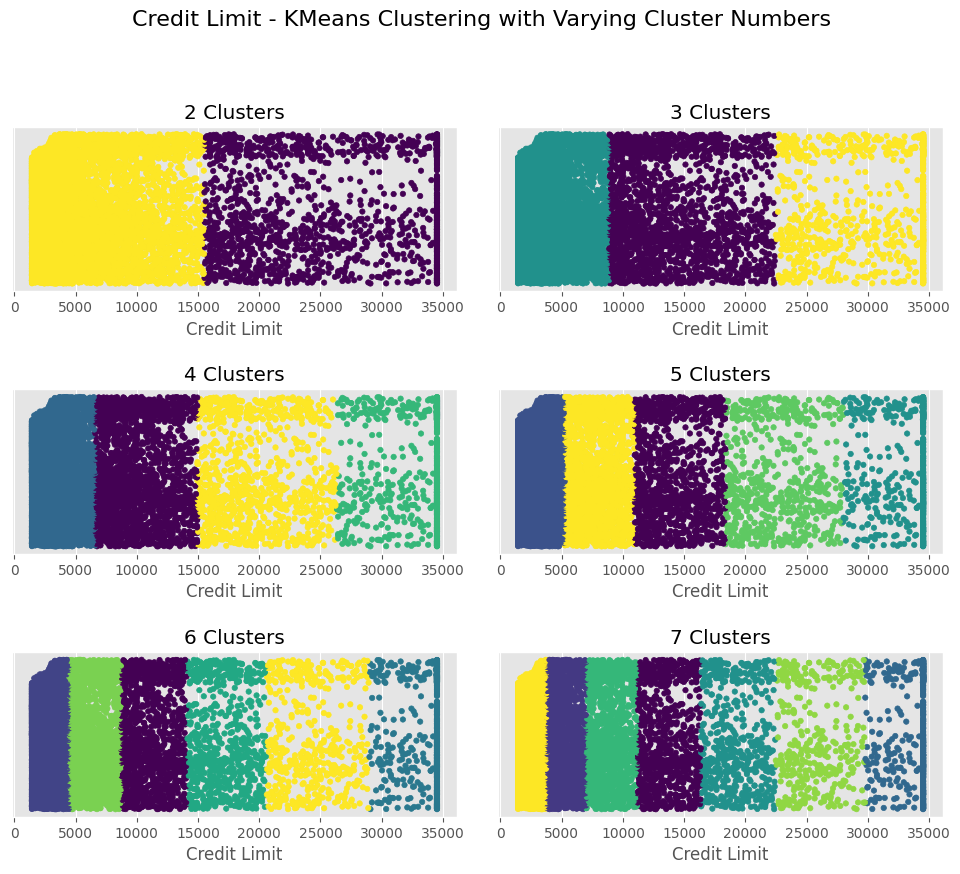

In [ ]:
# use plot_1d_clusters_with_variable_cluster_numbers function to visualize different number of clusters for Credit Limit
plot_1d_clusters_with_variable_cluster_numbers(df[['Credit_Limit']], 'Credit_Limit', 'Credit Limit')


In [ ]:
# choosing the best cluster number for Credit Limit and create the model
X = df[['Credit_Limit']]
model_CL = KMeans(n_clusters = 6, random_state = 7, n_init = 'auto').fit(X)
model_CL_labels = model_CL.labels_
pd.Series(model_CL_labels).unique()


In [ ]:
# plot the model which we chose the best cluster number for Credit Limit
fig = px.scatter(x = X['Credit_Limit'], y = X.index, color = model_CL_labels)
fig.update_yaxes(showticklabels = False, tickmode = 'linear')
fig.update_layout(
    title = 'Credit Limit Clustering',
    xaxis_title ='Credit Limit',
    yaxis_title = '',
    width = 800,
    height = 400
    )
fig.show()


### Total Transaction Amount

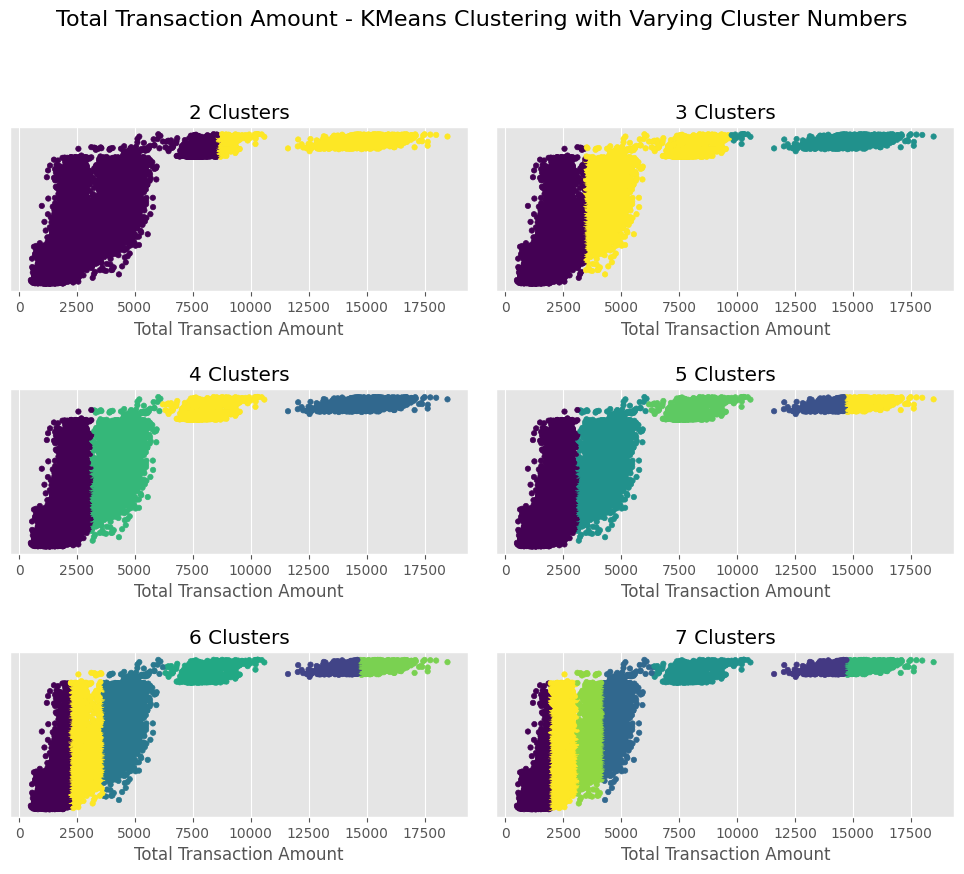

In [ ]:
# use plot_1d_clusters_with_variable_cluster_numbers function to visualize different number of clusters for Total Transaction Amount
plot_1d_clusters_with_variable_cluster_numbers(df[['Total_Trans_Amt']], 'Total_Trans_Amt', 'Total Transaction Amount')


In [ ]:
# choosing the best cluster number for Total Transaction Amount and create the model
X = df[['Total_Trans_Amt']]
model_TTA = KMeans(n_clusters = 6, random_state = 7, n_init = 'auto').fit(X)
model_TTA_labels = model_TTA.labels_
pd.Series(model_TTA_labels).unique()


array([0, 5, 2, 3, 1, 4], dtype=int32)

In [ ]:
# plot the model which we chose the best cluster number for Total Transaction Amount
fig = px.scatter(x = X['Total_Trans_Amt'], y = X.index, color = model_TTA_labels)
fig.update_yaxes(showticklabels = False, tickmode = 'linear')
fig.update_layout(
    title = 'Total Transaction Amount Clustering',
    xaxis_title ='Total Transaction Amount',
    yaxis_title = '',
    width = 800,
    height = 400
    )
fig.show()


### Average Utilization Ratio

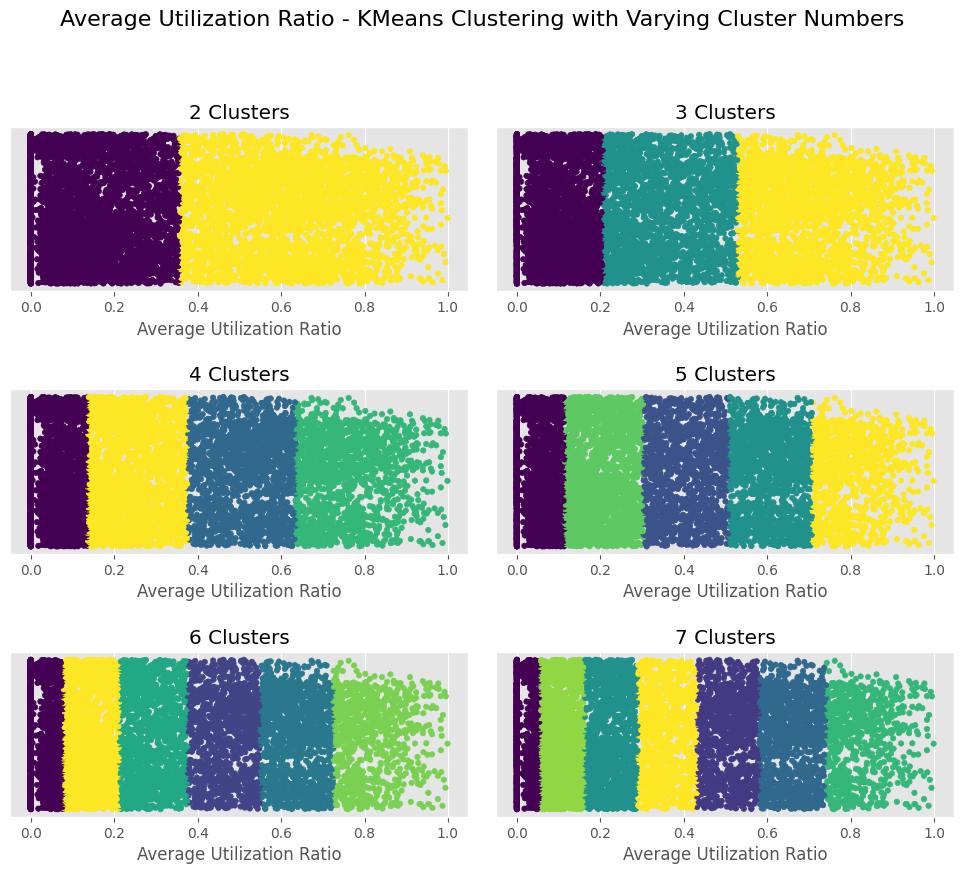

In [ ]:
# use plot_1d_clusters_with_variable_cluster_numbers function to visualize different number of clusters for Utalization Ratio
plot_1d_clusters_with_variable_cluster_numbers(df[['Avg_Utilization_Ratio']], 'Avg_Utilization_Ratio', 'Average Utilization Ratio')


In [ ]:
# choosing the best cluster number for Utalization Ratio and create the model
X = df[['Avg_Utilization_Ratio']]
model_AUR = KMeans(n_clusters = 7, random_state = 7, n_init = 'auto').fit(X)
model_AUR_labels = model_AUR.labels_
pd.Series(model_AUR_labels).unique()


array([5, 0, 4, 6, 3, 2, 1], dtype=int32)

In [ ]:
# plot the model which we chose the best cluster number for Utalization Ratio
fig = px.scatter(x = X['Avg_Utilization_Ratio'], y = X.index, color = model_AUR_labels)
fig.update_yaxes(showticklabels = False, tickmode = 'linear')
fig.update_layout(
    title = 'Average Utilization Ratio Clustering',
    xaxis_title ='Average Utilization Ratio',
    yaxis_title = '',
    width = 800,
    height = 400
    )
fig.show()




---



## 2-D Clustering

In [ ]:
def plot_2d_clusters_with_variable_cluster_numbers(X, column_name_1, column_name_2, real_column_name_1, real_column_name_2):

    '''
    Plots 2D KMeans clustering results with varying numbers of clusters on two features/columns.

    This function creates a grid of scatter plots displaying the results of KMeans clustering with cluster numbers
    ranging from 2 to 7, using two specified features from the input dataset. Each subplot corresponds to a different
    number of clusters, and the points are color-coded based on their assigned cluster labels.

    Parameters:
    -----------
    X : DataFrame
        The dataset to be clustered. It must contain at least two columns corresponding to the features specified
        by `column_name_1` and `column_name_2`, which will be used for clustering and visualization.

    column_name_1 : str
        The name of the column in `X` that represents the first feature for clustering and plotting on the x-axis.

    column_name_2 : str
        The name of the column in `X` that represents the second feature for clustering and plotting on the y-axis.

    real_column_name_1 : str
        The descriptive name of the first feature (used for x-axis labeling) that will be displayed in the plots.

    real_column_name_2 : str
        The descriptive name of the second feature (used for y-axis labeling) that will be displayed in the plots.

    Returns:
    --------
    None
        This function does not return any value. It generates a grid of scatter plots, where each plot shows the results
        of KMeans clustering with a different number of clusters (from 2 to 7) using the specified features.

    Example:
    --------
    >>> plot_2d_clusters_with_variable_cluster_numbers(df, 'Credit_Limit', 'Total_Trans_Amt', 'Credit Limit', 'Total Transaction Amount')
    (This would display a 3x2 grid of scatter plots showing KMeans clusters with 2 to 7 cluster centers based on the two features)
    '''

    # create a 3x2 subplot grid
    fig, axes = plt.subplots(3, 2, figsize=(10, 9))
    axes = axes.flatten()  # flatten the 2D array of axes to make it easier to iterate

    # Loop through the cluster values and add scatter plots to the grid
    for i, n_clusters in enumerate(range(2, 8)):

        # fit the KMeans model
        model = KMeans(n_clusters = n_clusters, random_state = 7, n_init = 'auto').fit(X)

        # get the cluster labels
        labels = model.labels_

        # plot scatter plot on the corresponding subplot
        axes[i].scatter(X[column_name_1], X[column_name_2], c = labels, cmap = 'viridis', marker = 'o', s = 15)
        axes[i].set_title(f'{n_clusters} Clusters')
        axes[i].set_xlabel(real_column_name_1, fontsize = 10)
        axes[i].set_ylabel(real_column_name_2, fontsize = 10)

    # adjust layout and add a global title
    fig.suptitle(
        f'Relationship Between {real_column_name_1} & {real_column_name_2} - K-Means Clustering with Varying Cluster Numbers',
        fontsize = 12
        )
    plt.tight_layout(rect = [0, 0, 1, 0.96], pad = 2)
    plt.show()


In [ ]:
def plot_2d_clusters_with_variable_eps_min_samples(
    X, column_name_1, column_name_2, real_column_name_1, real_column_name_2, epsilon, min_samples
    ):

    '''
    Plots 2D DBSCAN clustering results with varying epsilon and min_samples values on two features/columns.

    This function generates a row of scatter plots showing DBSCAN clustering results on two specified features
    from the input dataset. It varies the epsilon and min_samples values used by DBSCAN across three different
    scale factors (0.8, 1.0, 1.2), showing how the clustering output changes with different parameters.

    Parameters:
    -----------
    X : DataFrame
        The dataset to be clustered. It must contain at least two columns corresponding to the features specified
        by `column_name_1` and `column_name_2`, which will be used for clustering and visualization.

    column_name_1 : str
        The name of the column in `X` that represents the first feature for clustering and plotting on the x-axis.

    column_name_2 : str
        The name of the column in `X` that represents the second feature for clustering and plotting on the y-axis.

    real_column_name_1 : str
        The descriptive name of the first feature (used for x-axis labeling) that will be displayed in the plots.

    real_column_name_2 : str
        The descriptive name of the second feature (used for y-axis labeling) that will be displayed in the plots.

    epsilon : float
        The base value of epsilon for the DBSCAN algorithm, representing the maximum distance between two points
        to be considered as neighbors.

    min_samples : int
        The base value for the minimum number of points required to form a dense region (i.e., a cluster) in DBSCAN.

    Returns:
    --------
    None
        This function does not return any value. It generates a row of scatter plots showing DBSCAN clusters
        with varying epsilon and min_samples values across three different scales (0.8x, 1.0x, and 1.2x).

    Example:
    --------
    >>> plot_2d_clusters_with_variable_eps_min_samples(
                              df, 'Credit_Limit', 'Total_Trans_Amt', 'Credit Limit', 'Total Transaction Amount', 0.5, 5
                              )
    (This would display a 1x3 grid of scatter plots showing DBSCAN clusters with varying epsilon and min_samples values)
    '''

    # scale factors for epsilon and min_samples
    scale_factors = [0.8, 1.0, 1.2]

    # create a 1x3 subplot grid
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # iterate over scale factors to adjust epsilon and min_samples
    for i, scale in enumerate(scale_factors):
        # adjust epsilon and min_samples
        eps_value = epsilon * scale
        min_samples_value = int(min_samples * scale)

        # fit the dbscan model
        model = DBSCAN(eps = eps_value, min_samples = min_samples_value).fit(X)

        # get the cluster labels
        labels = model.labels_

        # plot scatter plot on the corresponding subplot
        axes[i].scatter(X[column_name_1], X[column_name_2], c = labels, cmap = 'viridis', marker = 'o', s = 15)
        axes[i].set_title(f'ε = {eps_value:.2f}, min_samples = {min_samples_value}')
        axes[i].set_xlabel(real_column_name_1, fontsize = 10)
        axes[i].set_ylabel(real_column_name_2, fontsize = 10)

    # adjust layout and add a global title
    fig.suptitle(
        f'Relationship Between {real_column_name_1} & {real_column_name_2} - DBSCAN Clustering with Varying Epsilon and min_samples',
        fontsize = 12
        )
    plt.tight_layout(rect = [0, 0, 1, 0.96], pad = 2)
    plt.show()


### Credit Limit and Total Transaction Amount

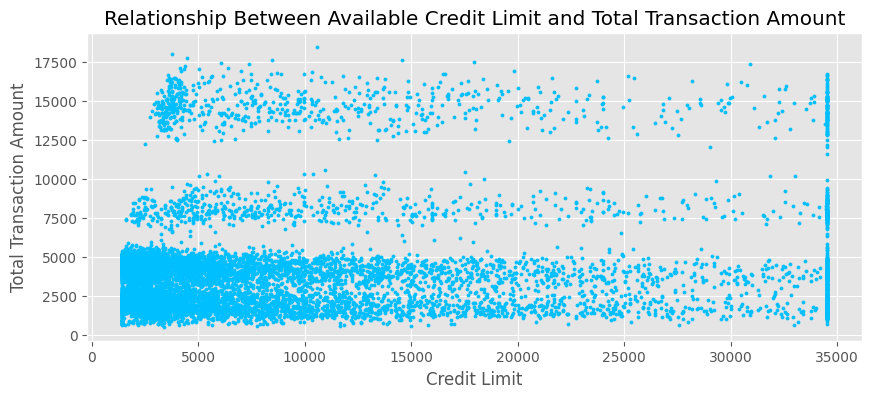

In [ ]:
# answering the question of do customers with higher credit limits spend more?
plt.figure(figsize = (10, 4))
plt.scatter(df['Credit_Limit'], df['Total_Trans_Amt'], s = 5, color = 'deepskyblue')
plt.xlabel('Credit Limit')
plt.ylabel('Total Transaction Amount')
plt.title('Relationship Between Available Credit Limit and Total Transaction Amount')
plt.show()


#### K-Means

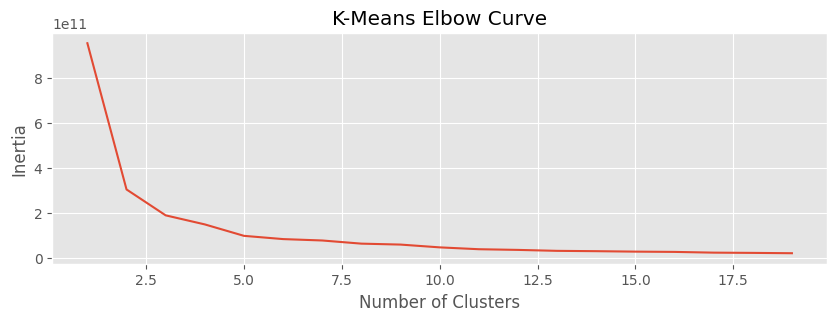

In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
kmeans_cluster_elbow(X, 20)


In [ ]:
plot_2d_clusters_with_variable_cluster_numbers(X, 'Credit_Limit', 'Total_Trans_Amt', 'Credit Limit', 'Total Transaction Amount')


In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
model_CT = KMeans(n_clusters = 6, random_state = 7, n_init = 'auto').fit(X)
model_CT_labels = model_CT.labels_
pd.Series(model_CT_labels).unique()


In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
fig = px.scatter(x = X['Credit_Limit'], y = X['Total_Trans_Amt'], color = model_CT_labels)
fig.update_layout(
    title = 'Credit Limit and Total Transaction Amount K-Means Clustering',
    xaxis_title ='Credit Limit',
    yaxis_title = 'Total Transaction Amount',
    width = 800,
    height = 400
    )
fig.show()


#### DBSCAM

In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
plot_2d_clusters_with_variable_eps_min_samples(
    X, 'Credit_Limit', 'Total_Trans_Amt', 'Credit Limit', 'Total Transaction Amount', 2500., 100
    )


In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
model_CT_db = DBSCAN(eps = 2500., min_samples = 100).fit(X)
model_CT_db_labels = pd.Series(model_CT_db.labels_)
print(model_CT_db_labels.value_counts())


In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
fig = px.scatter(x = X['Credit_Limit'], y = X['Total_Trans_Amt'], color = model_CT_db_labels)
fig.update_layout(
    title = 'Credit Limit and Total Transaction Amount DBSCAN Clustering',
    xaxis_title ='Credit Limit',
    yaxis_title = 'Total Transaction Amount',
    width = 800,
    height = 400
    )
fig.show()


### Credit Limit and Total Revolving Balance

In [ ]:
plt.scatter(df['Credit_Limit'], df['Total_Revolving_Bal'], s = 5, color = 'darkolivegreen')
plt.xlabel('Credit Limit')
plt.ylabel('Total Revolving Balance')
plt.title('Relationship Between Credit Limit and Total Revolving Balance')
plt.show()


#### K-Means

In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
kmeans_cluster_elbow(X, 20)


In [ ]:
plot_2d_clusters_with_variable_cluster_numbers(X, 'Credit_Limit', 'Total_Revolving_Bal', 'Credit Limit', 'Total Revolving Balance')


In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
model_CLRB_kmeans = KMeans(n_clusters = 4, random_state = 7, n_init = 'auto').fit(X)
model_CLRB_kmeans_labels = model_CLRB_kmeans.labels_
pd.Series(model_CLRB_kmeans_labels).unique()


In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
fig = px.scatter(x = X['Credit_Limit'], y = X['Total_Revolving_Bal'], color = model_CLRB_kmeans_labels)
fig.update_layout(
    title = 'Credit Limit and Total Revolving Balance - K-Means Clustering',
    xaxis_title ='Credit Limit',
    yaxis_title = 'Total Revolving Balance',
    width = 800,
    height = 400
    )
fig.show()


#### DBSCAM

In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
plot_2d_clusters_with_variable_eps_min_samples(
    X, 'Credit_Limit', 'Total_Revolving_Bal', 'Credit Limit', 'Total Revolving Balance', 500., 50
    )


In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
model_CLRB_db = DBSCAN(eps = 500., min_samples = 50).fit(X)
model_CLRB_db_labels = pd.Series(model_CLRB_db.labels_)
print(model_CLRB_db_labels.value_counts())


In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
fig = px.scatter(x = X['Credit_Limit'], y = X['Total_Revolving_Bal'], color = model_CLRB_db_labels)
fig.update_layout(
    title = 'Credit Limit and Total Revolving Balance - DBSCAN Clustering',
    xaxis_title ='Credit Limit',
    yaxis_title = 'Total Revolving Balance',
    width = 800,
    height = 400
    )
fig.show()


### Total Revolving Balance and Inactivity

In [ ]:
df.head()


In [ ]:
plt.scatter(df['Total_Revolving_Bal'], df['Months_Inactive_12_Mon'], s = 5, color = 'brown')
plt.xlabel('Total_Revolving_Bal')
plt.ylabel('Months_Inactive_12_Mon')
plt.title('Total_Revolving_Bal vs. Months_Inactive_12_Mon')
plt.show()


### Age and Total Transaction Amount

In [ ]:
plt.scatter(df['Customer_Age'], df['Total_Trans_Amt'], s = 5, color = 'green')
plt.xlabel('Customer Age')
plt.ylabel('Total Transaction Amount')
plt.title('Relationship Between Customer Age and Total Spent')
plt.show()


#### KMeans

In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
kmeans_cluster_elbow(X, 20)


In [ ]:
plot_2d_clusters_with_variable_cluster_numbers(X, 'Customer_Age', 'Total_Trans_Amt', 'Customer Age', 'Total Transaction Amount')


In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
model_CATA_kmeans = KMeans(n_clusters = 6, random_state = 7, n_init = 'auto').fit(X)
model_CATA_kmeans_labels = model_CATA_kmeans.labels_
pd.Series(model_CATA_kmeans_labels).unique()


In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
fig = px.scatter(x = X['Customer_Age'], y = X['Total_Trans_Amt'], color = model_CATA_kmeans_labels)
fig.update_layout(
    title = 'Customer Age and Total Transaction Amount K-Means Clustering',
    xaxis_title ='Customer Age',
    yaxis_title = 'Total Transaction Amount',
    width = 800,
    height = 400
    )
fig.show()


#### DBSCAN

In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
plot_2d_clusters_with_variable_eps_min_samples(
    X, 'Customer_Age', 'Total_Trans_Amt', 'Customer Age', 'Total Transaction Amount', 500., 50
    )


In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
model_CATA_db = DBSCAN(eps = 500., min_samples = 50).fit(X)
model_CATA_db_labels = pd.Series(model_CATA_db.labels_)
print(model_CATA_db_labels.value_counts())


In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
fig = px.scatter(x = X['Customer_Age'], y = X['Total_Trans_Amt'], color = model_CATA_db_labels)
fig.update_layout(
    title = 'Customer Age and Total Transaction Amount DBSCAN Clustering',
    xaxis_title ='Customer Age',
    yaxis_title = 'Total Transaction Amount',
    width = 800,
    height = 400
    )
fig.show()


✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨

## 3-D Clustering

### Dependent Count & Total Transaction Amount & Average Open To Buy

In [ ]:
X = df[['Dependent_Ct', 'Total_Trans_Amt', 'Avg_Open_To_Buy']].copy()
X.loc[:, 'Total_Trans_Amt'] = X['Total_Trans_Amt'] / 1000
X.loc[:, 'Avg_Open_To_Buy'] = X['Avg_Open_To_Buy'] / 1000

plt.figure(figsize = (10, 8))
ax = plt.axes(projection = '3d')

ax.scatter3D(X['Dependent_Ct'], X['Total_Trans_Amt'], X['Avg_Open_To_Buy'], s = 5)

ax.set_xlabel('Dependent_Ct')
ax.set_ylabel('Total_Trans_Amt [K]')
ax.set_zlabel('Avg_Open_To_Buy [K]', labelpad = 0.25)
ax.set_title('Relationship Between Dependent Count & Total Transaction Amount & Average Open To Buy', fontsize = 10)

plt.show()


In [ ]:
kmeans_cluster_elbow(X, 20)


In [ ]:
# fit the kmeans model
model_DTA = KMeans(n_clusters = 3, random_state = 7, n_init = 'auto')
model_DTA = model_DTA.fit(X)

# create a figure with a larger figsize to provide more room for labels
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')

# plot the 3d scatter plot
ax.scatter3D(
    X['Dependent_Ct'],
    X['Total_Trans_Amt'],
    X['Avg_Open_To_Buy'],
    c = model_DTA.labels_,
    cmap = 'viridis',
    s = 5
)

# set axis labels with increased label padding for the z-axis
ax.set_xlabel('Dependent_Ct')
ax.set_ylabel('Total_Trans_Amt [K]')
ax.set_zlabel('Avg_Open_To_Buy [K]', labelpad = 0.25)

# set the plot title
ax.set_title(
    'Relationship Between Dependent Count & Total Transaction Amount & Average Open To Buy', fontsize = 12
    )

# adjust layout to ensure nothing is cut off
plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1)
plt.show()


### Total Revolving Balance &	Average Open To Buy & Total Amount Change (Q4_Q1)

In [ ]:
X = df[['Total_Revolving_Bal',	'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1']].copy()
X.loc[:, 'Total_Revolving_Bal'] = X['Total_Revolving_Bal'] / 1000
X.loc[:, 'Avg_Open_To_Buy'] = X['Avg_Open_To_Buy'] / 1000

plt.figure(figsize = (10, 8))
ax = plt.axes(projection = '3d')

ax.scatter3D(X['Total_Revolving_Bal'], X['Avg_Open_To_Buy'], X['Total_Amt_Chng_Q4_Q1'], s = 5)

ax.set_xlabel('Total_Revolving_Bal [K]')
ax.set_ylabel('Avg_Open_To_Buy [K]')
ax.set_zlabel('Total_Amt_Chng_Q4_Q1 [K]')
ax.set_title('Relationship Between Total Revolving Balance & Average Open To Buy & Total Amount Change (Q4_Q1)', fontsize = 10)

plt.show()


In [ ]:
kmeans_cluster_elbow(X, 20)


In [ ]:
model_TTA = KMeans(n_clusters = 4, random_state = 7, n_init = 'auto')
model_TTA = model_TTA.fit(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter3D(
    X['Total_Revolving_Bal'],
    X['Avg_Open_To_Buy'],
    X['Total_Amt_Chng_Q4_Q1'],
    c = model_TTA.labels_,
    cmap = 'viridis',
    s = 5
    )

ax.set_xlabel('Total_Revolving_Bal [K]')
ax.set_ylabel('Avg_Open_To_Buy [K]')
ax.set_zlabel('Total_Amt_Chng_Q4_Q1 [K]')
ax.set_title('Relationship Between Total Revolving Balance & Average Open To Buy & Total Amount Change (Q4_Q1)', fontsize = 10)

plt.show()


✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨

## Higher Dimensional Spaces Clustering

In [ ]:
df_high_dim_space = df.copy()

for col in df_high_dim_space.columns:
  if df_high_dim_space[col].dtype == 'object':
    df_high_dim_space[col] = df_high_dim_space[col].astype('category').cat.codes

df_high_dim_space.head()




---



### Customer Age & Credit Limit & Average Open To Buy & Total Revolving Balalnce

In [ ]:
model_ACBR = KMeans(n_clusters = 4, random_state = 7, n_init = 'auto')
model_ACBR = model_ACBR.fit(df_high_dim_space[['Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal']])
pd.Series(model_ACBR.labels_).value_counts()


In [ ]:
df_high_dim_space['model_ACBR'] = model_ACBR.labels_
df_ACBR_1 = df_high_dim_space[df_high_dim_space['model_ACBR'] == 1]
df_ACBR_1.head()


In [ ]:
sns.kdeplot(data = df, x = 'Customer_Age')
sns.kdeplot(data = df_ACBR_1, x = 'Customer_Age')
plt.legend(['df', 'df_ACBR_1'])
plt.show()




---



### Customer Age & Dependent Count & Total Transaction Amount & Total Revolving Balalnce

In [ ]:
model_ADTR = KMeans(n_clusters = 5, random_state = 7, n_init = 'auto')
model_ADTR = model_ADTR.fit(df_high_dim_space[['Customer_Age', 'Dependent_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal']])
pd.Series(model_ADTR.labels_).value_counts()


In [ ]:
df_high_dim_space['model_ADTR'] = model_ADTR.labels_
df_ADTR_1 = df_high_dim_space[df_high_dim_space['model_ADTR'] == 0]
df_ADTR_1.head()


In [ ]:
sns.kdeplot(data = df, x = 'Customer_Age')
sns.kdeplot(data = df_ADTR_1, x = 'Customer_Age')
plt.legend(['df', 'df_ADTR_1'])
plt.show()


🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩

# Supervised Learning Model (Churn Classification)

In [ ]:
df.head()


In [ ]:
df_churn = df.copy()
df_churn = df_churn.drop(columns = ['Client_Num'])


In [ ]:
print(df_churn.Income_Category.value_counts())


In [ ]:
df_churn['Income_Category'] = df_churn['Income_Category'].replace({
    'Less than $40K': 40,
    '$40K - $60K': 50,
    '$80K - $120K': 100,
    '$60K - $80K': 70,
    'Unknown': None,
    '$120K +': 120
    })


In [ ]:
df_churn['Income_Category'] = df_churn['Income_Category'].fillna(df_churn['Income_Category'].mean())
print(df_churn['Income_Category'].head())


In [ ]:
categorical_cols = [
    'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_Ct',
    'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'
    ]
numerical_cols = df_churn.columns.difference(categorical_cols)

scaler = StandardScaler()
df_churn[numerical_cols] = scaler.fit_transform(df_churn[numerical_cols])

for col in categorical_cols:
  df_churn[col] = df_churn[col].astype('category').cat.codes

df_churn.head()


In [ ]:
X = df_churn.drop(columns = ['Attrition_Flag'])
y = df_churn['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)


## Logistic Regression Model

In [ ]:
clf = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
clf = clf.fit(X_train, y_train)


In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)


In [ ]:
# calculate the confusion matrix
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

cm_train, cm_test


In [ ]:
# visualize confusion matrix of training set
fig, axs = plt.subplots(1, 2, figsize = (10, 3))

sns.heatmap(cm_train, annot = True, cmap = 'Blues', fmt = 'd', ax = axs[0])
axs[0].set_title('Train')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot = True, cmap = 'Blues', fmt = 'd', ax = axs[1])
axs[1].set_title('Test')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.suptitle('Logistic Regression - Confusion Matrix')
plt.show()


## Decision Tree Model

In [ ]:
clf_dt = DecisionTreeClassifier().fit(X_train, y_train)


In [ ]:
clf_dt.score(X_train, y_train), clf_dt.score(X_test, y_test)


In [ ]:
# calculate the confusion matrix
y_train_pred = clf_dt.predict(X_train)
y_test_pred = clf_dt.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

cm_train, cm_test


In [ ]:
# visualize confusion matrix of training set
fig, axs = plt.subplots(1, 2, figsize = (10, 3))

sns.heatmap(cm_train, annot = True, cmap = 'Blues', fmt = 'd', ax = axs[0])
axs[0].set_title('Train')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot = True, cmap = 'Blues', fmt = 'd', ax = axs[1])
axs[1].set_title('Test')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.suptitle('Decision Tree Model - Confusion Matrix')
plt.show()




---



### Choosing Decision Tree Model

In [ ]:
clf_dt = DecisionTreeClassifier().fit(X_train, y_train)
with open('Credit_Card_Customers_Project.pickle', 'wb') as f:
    pickle.dump(clf_dt, f)


---
**End of Project**